# **1) Import the Modules**

Modules are code libraries that contain a set of ready-to-use functions.

* The `os` module provides functions to perform tasks such as file and directory operations, process management, and environment variable manipulation.
* The `numpy` module provides support for large, multi-dimensional arrays and matrices, as well as a collection of mathematical functions to efficiently manipulate these arrays.
* The `pandas` module provides a powerful and efficient toolkit for data manipulation, analysis, and exploration.
* The `seaborn` module provides a high-level interface for creating informative and visually appealing statistical graphics.
* The `matplotlib.pyplot` module provides a collection of functions for creating and customizing plots, diagrams and visualizations.
* The `google.colab` module provides access to some of the unique features and functionality of Google Colab.

In [1]:
import os
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

# **2) Authentication Procedure**

This section provides instructions for setting up the Google Earth Engine Python API on Colab and for setting up Google Drive on Colab. These steps should be performed each time you start/restart/rollback a Colab session.

## **2.1) GD**

The `drive.mount` function allows access to specific folders of Google Drive. Granting access to Google Drive allows code running in the notebook to modify files in Google Drive.

**Note:** When using the `Mount Drive` button in the file browser, no authentication codes are required for notebooks edited only by the current user.

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **3) Functions**

Individual metrics

In [8]:
def feature_importance(dct, destinationPath):
  """
  Description:
    Creates a bar plot of feature importances.

  Arguments:
    dct (dict): A dictionary of feature importances.
    destinationPath (str): The destination path of the bar plot.

  Returns:
    None
  """
  # Extract keys and values from the dictionary.
  features, values = zip(*dct.items())

  # Create a figure and a set of subplots
  fig, ax = plt.subplots(figsize=(10, 7))

  # Set plot title.
  plt.title("Feature Importance", fontsize=18, fontweight="bold", color="#595959")

  # Edit axes

  plt.xticks(rotation=45, ha="center", fontsize=14, fontweight="bold", color="#595959")
  plt.yticks(fontsize=14, fontweight="bold", color="#595959")

  # Add grid lines
  plt.grid(color="white", linestyle="--", linewidth=0.5)

  # Set facecolor
  ax.set_facecolor("lightgray")

  # Create bar plot

  plt.bar(features, values)

  # Add bar labels
  for i, v in enumerate(values):
    plt.text(i, v, f"{v:.3f}", ha="center", va="bottom", fontsize=12)

  # Save plot
  plt.savefig(destinationPath, dpi=500, bbox_inches="tight")
  plt.close()


def confusion_matrix(matrix, labels, destinationPath):
  """
  Description:
    Generates a heatmap-style confusion matrix visualization. The diagonal elements of the matrix
    are highlighted separately to provide a clear view of true positives, while off-diagonal
    elements are displayed with a different color scheme to represent
    false positives and false negatives.

  Arguments:
    matrix (numpy.ndarray): The confusion matrix to be visualized.
    labels (list): Labels corresponding to the classes in the confusion matrix.
    destinationPath (str): Name of the file to export the visualization.

  Returns:
    None
  """
  # Create a figure and a set of subplots
  fig = plt.figure(figsize=(10, 8))

  # Make heatmap
  sns.heatmap(matrix, annot=labels, fmt="", cmap="Blues", cbar=True, linecolor="k", square=True,
              xticklabels=classLabels, yticklabels=classLabels, annot_kws={"fontsize":14})

  # Handle spines.
  sns.despine(left=False, right=False, top=False, bottom=False)

  # Add plot title and labels.
  plt.title("Confusion Matrix", fontsize=18, fontweight="bold")

  # Edit axes

  plt.xlabel("Predicted", fontsize=14, fontweight="bold")
  plt.ylabel("Actual", fontsize=14, fontweight="bold")

  plt.xticks(fontsize=14, fontweight="bold")
  plt.yticks(fontsize=14, fontweight="bold")

  # Save plot
  plt.savefig(destinationPath, dpi=500, bbox_inches="tight")
  plt.close()


Summarized metrics

In [94]:
def plot_individual_f1scores(frame, destinationPath):
  """
  Description:
    Saves F1-scores for different classes based on classifier identifiers. The plot includes
    distinctive markers and colors for each class, along with data point annotations.

  Arguments:
    frame (pandas.DataFrame): A DataFrame containing classifier performance data.
    destinationPath (str): The file path and name to save the plot.

  Returns:
    None
  """
  # Create a figure and a set of subplots
  fig, ax = plt.subplots(figsize=(40, 10))

  # Set plot title
  plt.title("F1-scores", fontsize=24, fontweight="bold", color="#595959")

  # Edit axes

  plt.yticks(fontsize=16, fontweight="bold", color="#595959")

  ax.set_xticks(range(len(frame["classifier"])))
  ax.set_xticklabels(frame["classifier"], rotation=65, ha="center", fontsize=16, fontweight="bold", color="#595959")

  # Add grid lines
  plt.grid(color="white", linestyle="--", linewidth=0.5)

  # Set facecolor
  ax.set_facecolor("lightgray")

  # Plot data for each class with distinctive markers and colors.
  ax.plot(frame["classifier"], frame["class_0_f1_score"], linestyle="dotted", marker="o", linewidth=4, markersize=12, label="non_water", color="#deb887")
  ax.plot(frame["classifier"], frame["class_1_f1_score"], linestyle="dotted", marker="o", linewidth=4, markersize=12, label="flood", color="#C60404")
  ax.plot(frame["classifier"], frame["class_2_f1_score"], linestyle="dotted", marker="o", linewidth=4, markersize=12, label="water", color="#45b6fe")

  # # Annotate data points.
  # for x, y in zip(frame["classifier"], frame["class_0_f1_score"]): ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points", xytext=(0, -15), ha="center")
  # for x, y in zip(frame["classifier"], frame["class_1_f1_score"]): ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points", xytext=(0, -15), ha="center")
  # for x, y in zip(frame["classifier"], frame["class_2_f1_score"]): ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points", xytext=(0, -15), ha="center")

  # Set legend
  legend = plt.legend()

  for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_fontsize(12)

  # Save plot
  plt.savefig(destinationPath, dpi=500, bbox_inches="tight")
  plt.close()


def plot_mean_f1scores(frame, destinationPath):
  """
  Description:
    Saves F1-scores for different classes based on classifier identifiers. The plot includes
    distinctive markers and colors for each class, along with data point annotations.

  Arguments:
    frame (pandas.DataFrame): A DataFrame containing classifier performance data.
    destinationPath (str): The file path and name to save the plot.

  Returns:
    None
  """
  # Create a figure and a set of subplots
  fig, ax = plt.subplots(figsize=(40, 10))

  # Set plot title
  plt.title("F1-scores", fontsize=24, fontweight="bold", color="#595959")

  # Edit plot

  plt.yticks(fontsize=16, fontweight="bold", color="#595959")

  ax.set_xticks(range(len(frame["classifier"])))
  ax.set_xticklabels(frame["classifier"], rotation=65, ha="center", fontsize=16, fontweight="bold", color="#595959")

  # Add grid lines.
  plt.grid(color="white", linestyle="--", linewidth=0.5)

  # Set facecolor
  ax.set_facecolor("lightgray")

  # Plot data with distinctive markers and colors.
  ax.plot(frame["classifier"], frame["mean_f1_score"], linestyle="dotted", marker="o", linewidth=4, markersize=12, label="Mean", color="#AF69EE")

  # # Annotate data points.
  # for x, y in zip(frame["classifier"], frame["mean_f1_score"]): ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points", xytext=(0, -15), ha="center")
  for x, y in zip(frame["classifier"], frame["mean_f1_score"]):
    ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points", xytext=(0, -15), ha="center", fontsize=12, fontweight="bold")


  # Set legend
  legend = plt.legend()

  for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_fontsize(12)

  # Save the plot to a file with high resolution.
  plt.savefig(destinationPath, dpi=500, bbox_inches="tight")
  plt.close()


def plot_coefficient_variance(frame, destinationPath):
  """
  Description:
    Saves F1-scores for different classes based on classifier identifiers. The plot includes
    distinctive markers and colors for each class, along with data point annotations.

  Arguments:
    frame (pandas.DataFrame): A DataFrame containing classifier performance data.
    destinationPath (str): The file path and name to save the plot.

  Returns:
    None
  """
  # Extract precipitation keys and values
  fig, ax = plt.subplots(figsize=(40, 10))

  # Set plot title
  plt.title("Coefficient Variance", fontsize=24, fontweight="bold", color="#595959")

  # Edit axes

  plt.yticks(fontsize=16, fontweight="bold", color="#595959")

  ax.set_xticks(range(len(frame["classifier"])))
  ax.set_xticklabels(frame["classifier"], rotation=65, ha="center", fontsize=16, fontweight="bold", color="#595959")

  # Add grid lines.
  plt.grid(color="white", linestyle="--", linewidth=0.5)

  # Add grid lines
  ax.set_facecolor("lightgray")

  # Plot data with distinctive markers and colors.
  ax.plot(frame["classifier"], frame["cv_f1_score"], linestyle="dotted", marker="o", linewidth=4, markersize=12, label="CV", color="#AF69EE")

  # Annotate data points.
  # for x, y in zip(frame["classifier"], frame["cv_f1_score"]): ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points", xytext=(0, -15), ha="center")
  for x, y in zip(frame["classifier"], frame["cv_f1_score"]):
      ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points", xytext=(0, -15), ha="center", fontsize=12, fontweight="bold")

  # Set legend
  legend = plt.legend()

  for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_fontsize(12)

  # Save plot
  plt.savefig(destinationPath, dpi=500, bbox_inches="tight")
  plt.close()

# **4) Parameters**

In [124]:
# Runtime stuff.
classLabels = ["non water", "flood", "water"]

# GD paths.
# workingFolder = "/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/feature_selection/"
workingFolder = "/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/"

# **5) Data Visualization**

## Individual metrics

In [ ]:
classifierIdentifiers = os.listdir(workingFolder)
classifierIdentifiers.remove("summary")
classifierIdentifiers.sort(key=len, reverse=True)

Confusion Matrix

In [ ]:
for identifier in classifierIdentifiers:
  print(f"Processing classifier: `{identifier}`.")

  # Construct paths.
  path = os.path.join(workingFolder, identifier, "confusion_matrix.csv")
  destination = os.path.join(workingFolder, identifier, "confusion_matrix.png")

  # Parse the dataframe as a dictionary.
  dct = pd.read_csv(path).to_dict(orient="records")[0]

  # Extract class-wise metric values.
  class0 = [int(num) for num in dct["class_0"].split(",")]
  class1 = [int(num) for num in dct["class_1"].split(",")]
  class2 = [int(num) for num in dct["class_2"].split(",")]

  matrix = np.array([class0, class1, class2])

  # Create custom cell labels.
  groupCounts = [f"{value:0.0f}" for value in matrix.flatten()]
  groupPercentages = [f"{value:.2%}" for value in matrix.flatten() / np.sum(matrix)]

  labels = [f"{cnt}\n{pct}" for cnt, pct in zip(groupCounts, groupPercentages)]
  labels = np.asarray(labels).reshape(3, 3)

  # Create the correlation matrix.
  confusion_matrix(matrix, labels, destination)
  print(f"Stored confusion matrix to: `{destination}`.\n")

Processing classifier: `Trs100_Vrbs1_Lvs2_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs2_Sd0/confusion_matrix.png`.

Processing classifier: `Trs100_Vrbs1_Lvs3_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs3_Sd0/confusion_matrix.png`.

Processing classifier: `Trs100_Vrbs1_Lvs5_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs5_Sd0/confusion_matrix.png`.

Processing classifier: `Trs100_Vrbs1_Lvs7_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs7_Sd0/confusion_matrix.png`.

Processing classifier: `Trs100_Vrbs2_Lvs2_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs2_Lvs2_Sd0/confusion_matrix.pn

Error Matrix

In [ ]:
for identifier in classifierIdentifiers:
  print(f"Processing classifier: `{identifier}`.")

  # Construct paths.
  path = os.path.join(workingFolder, identifier, "error_matrix.csv")
  destination = os.path.join(workingFolder, identifier, "error_matrix.png")

  # Parse the dataframe as a dictionary.
  dct = pd.read_csv(path).to_dict(orient="records")[0]

  # Extract class-wise metric values.
  class0 = [int(num) for num in dct["class_0"].split(",")]
  class1 = [int(num) for num in dct["class_1"].split(",")]
  class2 = [int(num) for num in dct["class_2"].split(",")]

  matrix = np.array([class0, class1, class2])

  # Create custom cell labels.
  groupCounts = [f"{value:0.0f}" for value in matrix.flatten()]
  groupPercentages = [f"{value:.2%}" for value in matrix.flatten() / np.sum(matrix)]

  labels = [f"{cnt}\n{pct}" for cnt, pct in zip(groupCounts, groupPercentages)]
  labels = np.asarray(labels).reshape(3, 3)

  # Create the correlation matrix.
  confusion_matrix(matrix, labels, destination)
  print(f"Stored confusion matrix to: `{destination}`.\n")

Processing classifier: `Trs100_Vrbs1_Lvs2_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs2_Sd0/error_matrix.png`.

Processing classifier: `Trs100_Vrbs1_Lvs3_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs3_Sd0/error_matrix.png`.

Processing classifier: `Trs100_Vrbs1_Lvs5_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs5_Sd0/error_matrix.png`.

Processing classifier: `Trs100_Vrbs1_Lvs7_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs7_Sd0/error_matrix.png`.

Processing classifier: `Trs100_Vrbs2_Lvs2_Sd0`.
Stored confusion matrix to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs2_Lvs2_Sd0/error_matrix.png`.

Processing clas

Feature Importances

In [ ]:
for identifier in classifierIdentifiers:
  print(f"Processing classifier: `{identifier}`.")

  # Construct paths.
  path = os.path.join(workingFolder, identifier, "feature_importances.csv")
  destination = os.path.join(workingFolder, identifier, "feature_importances.png")

  # Parse the dataframe as a dictionary.
  dct = pd.read_csv(path).to_dict("records")[0]

  # Create a bar plot of feature importances.
  feature_importance(dct, destination)
  print(f"Stored features importance plot to: `{destination}`.\n")

Processing classifier: `Trs100_Vrbs1_Lvs2_Sd0`.
Stored features importance plot to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs2_Sd0/feature_importances.png`.

Processing classifier: `Trs100_Vrbs1_Lvs3_Sd0`.
Stored features importance plot to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs3_Sd0/feature_importances.png`.

Processing classifier: `Trs100_Vrbs1_Lvs5_Sd0`.
Stored features importance plot to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs5_Sd0/feature_importances.png`.

Processing classifier: `Trs100_Vrbs1_Lvs7_Sd0`.
Stored features importance plot to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparameter_tuning/Trs100_Vrbs1_Lvs7_Sd0/feature_importances.png`.

Processing classifier: `Trs100_Vrbs2_Lvs2_Sd0`.
Stored features importance plot to: `/content/gdrive/MyDrive/t-h-e-s-i-s/results/classifiers/hyperparame

## Summarized metrics

In [125]:
summaryIdentifier = os.path.join(workingFolder, "summary")

In [126]:
# Collect paths.
paths = []

for root, dirs, files in os.walk(workingFolder):
  dirs.sort(key=len, reverse=True)

  pattern = os.path.join(root, "*.csv")
  matchingFiles = glob.glob(pattern)
  paths.extend(matchingFiles)

# Extract unique basenames.
baseNames = {os.path.basename(path) for path in paths}
baseNames.remove("feature_importances.csv")

for baseName in baseNames:
  # Collect matching paths.
  matchingPaths = [path for path in paths if baseName in path]
  # Read CSV files into dataframes.
  dataframes = [pd.read_csv(path) for path in matchingPaths]

  # Add `classifier` as the first column for each dataframe.
  for path, df in zip(matchingPaths, dataframes):
    classifier = os.path.basename(os.path.dirname(path))
    df.insert(0,"classifier", classifier)

  # Concatenate the dataframes.
  summaryFrame = pd.concat(dataframes, ignore_index=True)

  # Store the concatenated dataframe.
  outputPath = os.path.join(summaryIdentifier, baseName)
  summaryFrame.to_csv(outputPath, index=False)

Confusion F1 scores

In [127]:
path = os.path.join(summaryIdentifier, "confusion_matrix_metrics.csv")
destination = os.path.join(summaryIdentifier, "confusion_f1_scores.png")

frame = pd.read_csv(path)

plot_individual_f1scores(frame, destination)

In [128]:
path = os.path.join(summaryIdentifier, "confusion_matrix_metrics.csv")
destination = os.path.join(summaryIdentifier, "confusion_f1_scores_mean.png")

frame = pd.read_csv(path)
frame["mean_f1_score"] = frame[["class_0_f1_score", "class_1_f1_score", "class_2_f1_score"]].mean(axis=1)

plot_mean_f1scores(frame, destination)

In [129]:
path = os.path.join(summaryIdentifier, "confusion_matrix_metrics.csv")
destination = os.path.join(summaryIdentifier, "confusion_variance.png")

frame = pd.read_csv(path)
frame["mean_f1_score"] = frame[["class_1_f1_score"]].mean(axis=1)
frame["std_f1_score"] = frame[["class_0_f1_score", "class_1_f1_score", "class_2_f1_score"]].std(axis=1)
frame["cv_f1_score"] = (frame["std_f1_score"] / frame["mean_f1_score"]) * 100

plot_coefficient_variance(frame, destination)

Error F1 scores

In [130]:
path = os.path.join(summaryIdentifier, "error_matrix_metrics.csv")
destination = os.path.join(summaryIdentifier, "error_f1_scores.png")

frame = pd.read_csv(path)

plot_individual_f1scores(frame, destination)

In [131]:
path = os.path.join(summaryIdentifier, "error_matrix_metrics.csv")
destination = os.path.join(summaryIdentifier, "error_f1_scores_mean.png")

frame = pd.read_csv(path)
frame["mean_f1_score"] = frame[["class_0_f1_score", "class_1_f1_score", "class_2_f1_score"]].mean(axis=1)

plot_mean_f1scores(frame, destination)

In [132]:
path = os.path.join(summaryIdentifier, "error_matrix_metrics.csv")
destination = os.path.join(summaryIdentifier, "error_variance.png")

frame = pd.read_csv(path)
frame["mean_f1_score"] = frame[["class_1_f1_score"]].mean(axis=1)
frame["std_f1_score"] = frame[["class_0_f1_score", "class_1_f1_score", "class_2_f1_score"]].std(axis=1)
frame["cv_f1_score"] = (frame["std_f1_score"] / frame["mean_f1_score"]) * 100

plot_coefficient_variance(frame, destination)

ValueError: ignored

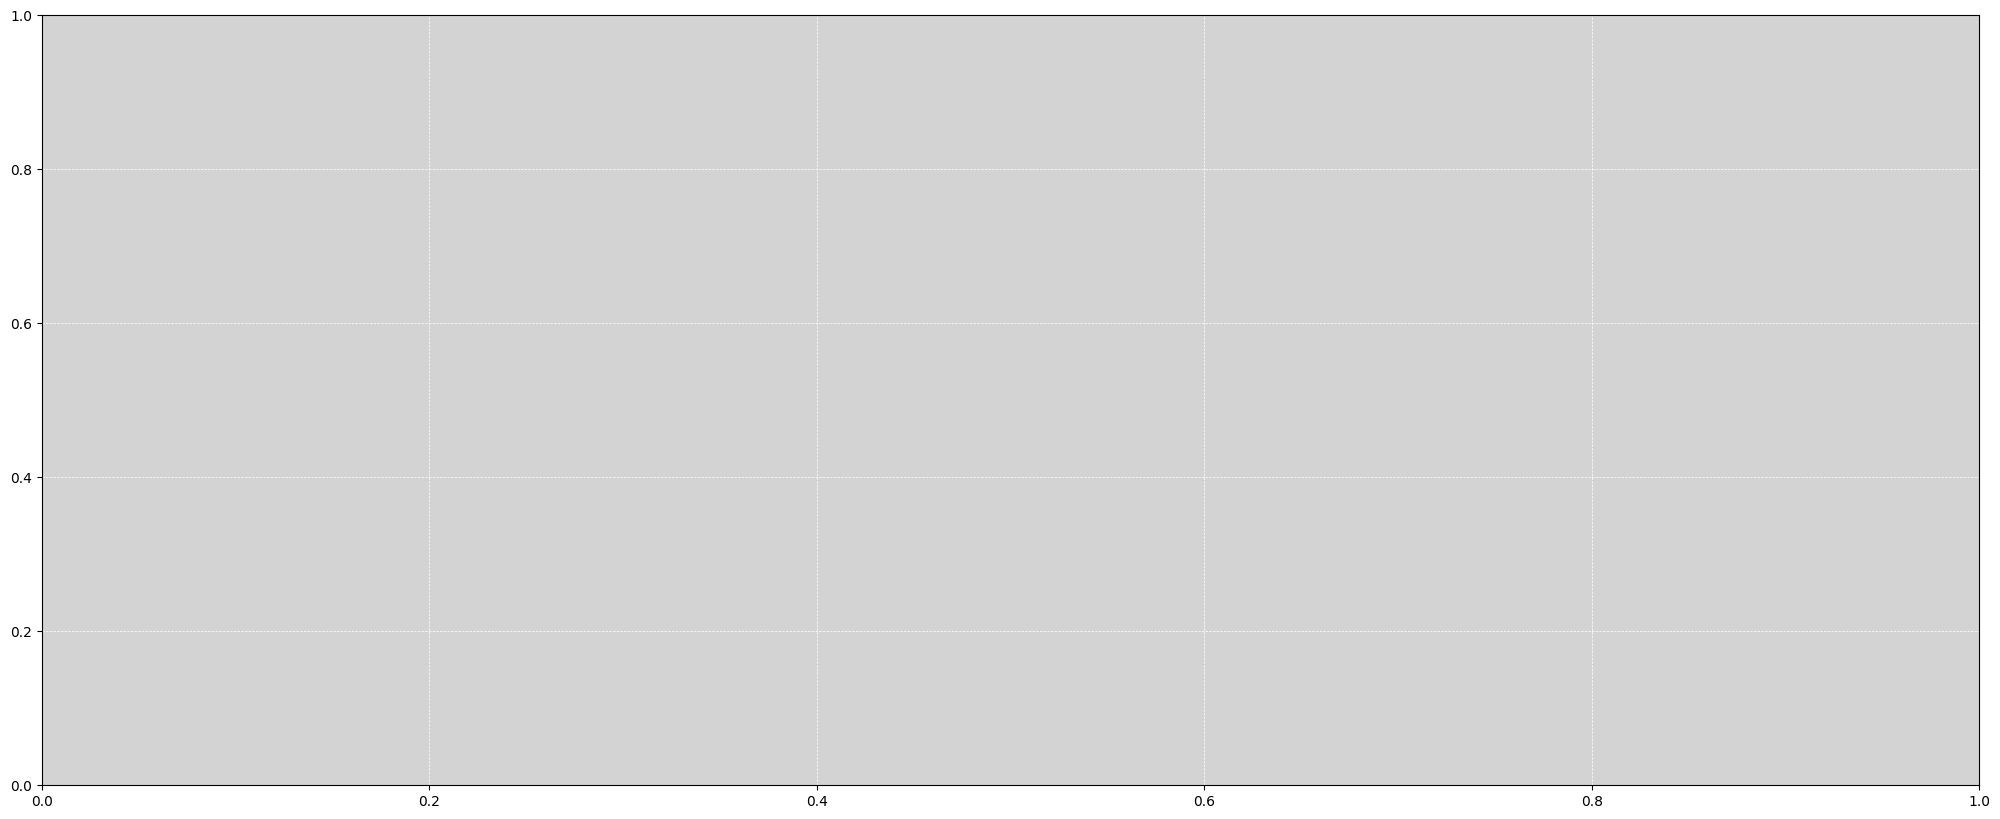

In [123]:
# Define plot parameters
barWidth = 0.275
index = np.array(range(73))

classPalette = {
  "non water": "#deb887",
  "flood": "#C60404",
  "water": "#45b6fe"
}

path = os.path.join(summaryIdentifier, "error_matrix_metrics.csv")
destination = os.path.join(summaryIdentifier, "f1_scores.png")

# Process the dataframe.
frame = pd.read_csv(path)

# Remove the last row.
# frame = frame.iloc[:-1]

# # Concatenate the "code" and "area" columns into one.
# frame["code_area"] = frame["code"] + "_" + frame["area"]

# Subset the dataframe.
frame = frame[["classifier", "class_0_f1_score", "class_1_f1_score", "class_2_f1_score"]]

# Reshape the dataframe.
frame = pd.melt(frame, id_vars=["classifier"], var_name="F1_score_class", value_name="F1_score")

frame["F1_score_class"] = frame["F1_score_class"].replace("class_0_f1_score", "non water")
frame["F1_score_class"] = frame["F1_score_class"].replace("class_1_f1_score", "flood")
frame["F1_score_class"] = frame["F1_score_class"].replace("class_2_f1_score", "water")

# Create grouped bar plot.
fig, ax = plt.subplots(figsize=(25, 10))

# Add grid lines.
plt.grid(color="white", linestyle="--", linewidth=0.5)

# Set the color inside the plot behind the bars.
ax.set_facecolor("lightgray")

# Iterate through class labels and their respective colors.
for i, class_label in enumerate(list(classPalette.keys())):

  # Filter values for the current class label.
  values = frame[frame["F1_score_class"] == class_label]["F1_score"]
  # Calculate x-positions for bars.
  barPositions = index + i * barWidth

  # Create bars for the current class.
  bars = ax.bar(barPositions, values, width=barWidth, label=class_label, color=classPalette[class_label])

  # Annotate bars.
  for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.3f}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha="center", fontsize=10)

# Set the x-axis ticks and labels.
ax.set_xticks(index + 0.5 * (len(list(classPalette.keys())) - 1) * barWidth)
ax.set_xticklabels(frame["classifier"].unique(), rotation=45, ha="center")

# Customize plot.
plt.legend(loc="lower right")
plt.title("F1 Scores")
plt.tight_layout()
plt.savefig(destination, dpi=500)
plt.close()

print(f"Stored confusion matrix to: `{destination}`.")

-End of Notebook-